In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Data scanning 

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Explore data

In [4]:
#Summary Statistics
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


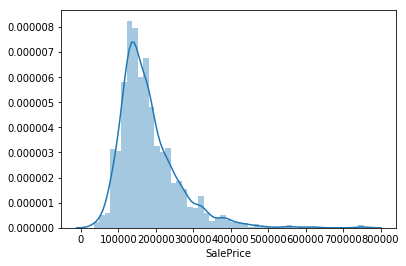

In [5]:
# I think this graph is more elegant than pandas.hist()
#train['SalePrice'].hist(bins=100)
sns.distplot(train['SalePrice'])

In [6]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Overview
There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [8]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

# quantitative = train.select_dtypes(include=("float64", "int64"))
# qualitative = train.select_dtypes(include=("object"))

In [9]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

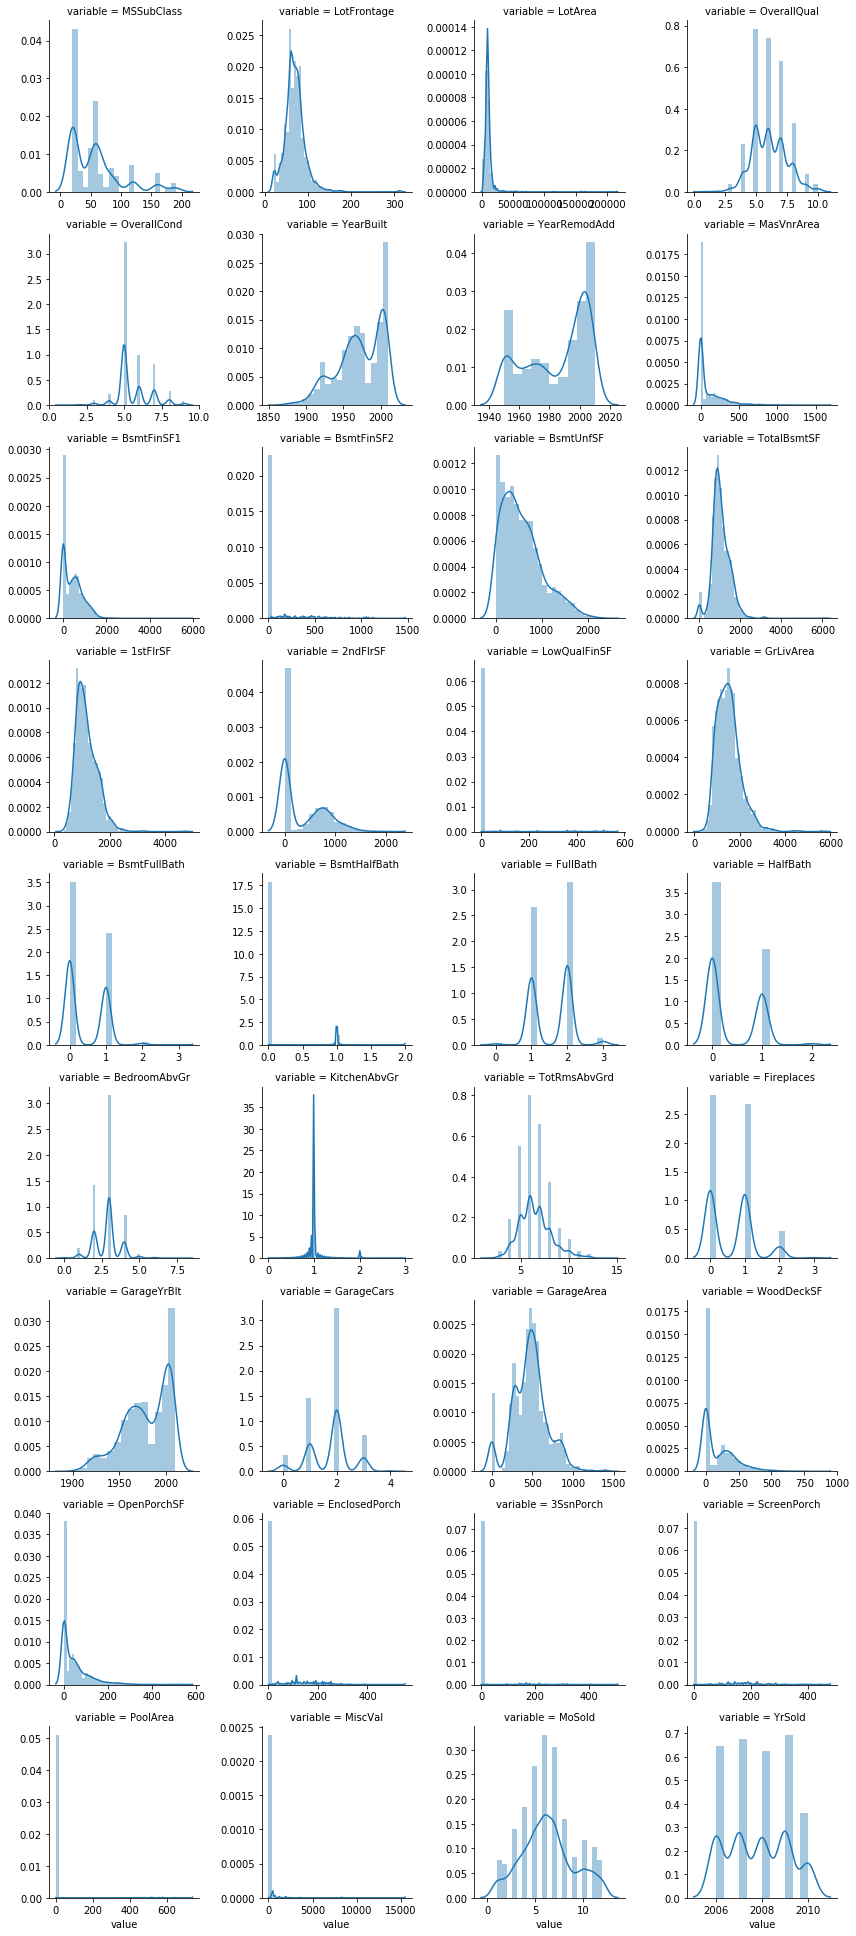

In [10]:
# quantitative data
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [11]:
# Categorical data
# With qualitative variables we can implement two methods. First one is to check distribution of SalePrice with respect to variable values and enumerate them. Second to create dummy variable for each possible category.

C:\Users\dojin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


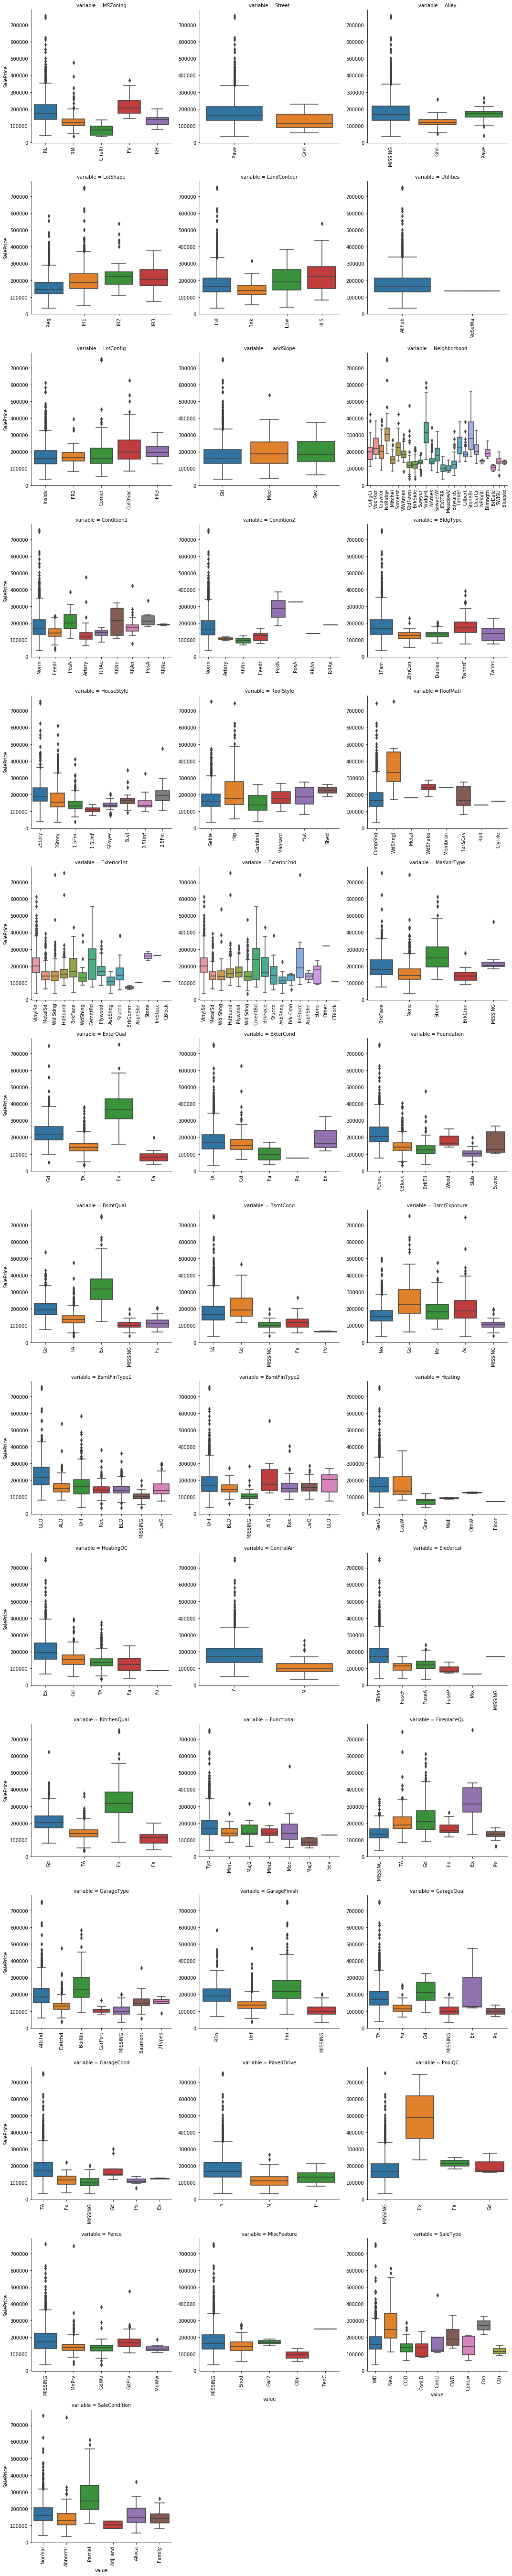

In [12]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')
        # null -> missing 카데고리를 만든다

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices.  It seems that there are relatively many conditions for partial sales in expensive houses. Having an excellent swimming pool seems to have many effects on housing prices. There are also differences in variabilities between category values.

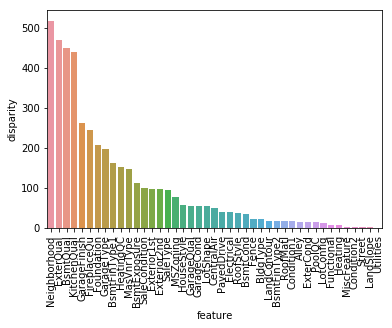

In [13]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative #질적 변수들을 사용
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique(): # 각 독립변수의 카테고리들간의 SalePrice 평균값의 차이가 유의미 한지 ANOVA로 분석
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals 
    return anv.sort_values('pval') 

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values) # p-value를 역으로 해서 차이가 큰거부터 줄어들도록 표시.
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

#p-value 작은거 부터 왼쪽에 오도록 한다. 즉, 카테고리들간의 종속변수에 대한 평균값 차이가 큰거부터 왼쪽. 
#왼쪽변수일수록 종속변수에 대한 영향력이 크다. 카테고리들 간의 분포가 유의미 하게 차이가 나기 때문이다.


many statistical analyses require an assumption of normality, such as analysis of variance(ANOVA) test. stats.f_oneway() does this. So transformations are used to make your data approximately normal.  
If you want to know how to determine which transformation to use, then you first need to know property of them. 
square-root for count data, such as the bacterial colonies per petri dish
log for size data: many variables in biology have log-normal distributions, meaning that after log-transformation, the values are normally distributed. such as the height of planted maple seeds. 

Here is quick estimation of influence of categorical variable on SalePrice. For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions. If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.



## Imputation

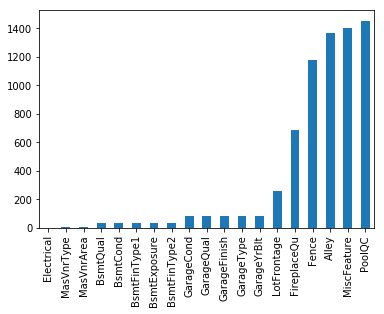

In [14]:
# 뒤에서 기존 na를 가지고 있는 원본 train을 사용하기위해
train1 = pd.read_csv('./data/train.csv')

# count the number of NaN values in each column
missing = train1.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


#19 attributes have missing values, 5 over 50% of all data. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

In [15]:
dfNullPct = train1.isnull().sum() * 100 / len(train1)
missings = pd.DataFrame(dfNullPct.drop(dfNullPct[dfNullPct == 0].index).sort_values(ascending=False), columns=['Missing Pct'])
missings

,Missing Pct
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


1.poolQc, Fence, FireplaceQu, GarageXX, BsmtXX,MasVnrArea, MiscFeature: 존재가 없음 이므로 0변환

2.Alley: NA다수고 히트맵만으론 연관된 상관변수가 없어보이나 박스플롯을 분석해보면 pave값과 비슷하고 논리적 연관변수인 Street와 비교해도 pave로 대체가능해보인다. 도시데이터란 점을 감안하면 더욱 합리적으로 보인다. 삭제없이 pave로 대체하거나 카테고리 순서만 변경해서 사용한다.

3.LotFrontage: NA다수고 상관관계 높은 utility가 대체할 변수로 쓰이니 삭제. 

4.MasVnrType는 missing값이 두번쨰로 가격이 높은 카테고리고 None 카테고리도 존재하고 Cinder Block이 data description에서 존재하는데 
값에 빠진것으로 보아 cinder block이 실수로 누락되었다고 본다. MasVnrArea와 상관변수라 비교해봐도 None카테고리가 면적0과 일치하므로
명백하다. 그러나 MasVnrArea에선 cinder block 면적이 누락되었기에 상관변수인 MasVnrType를 대표로 사용한다.

5.Electrical을 보면 순서형 변수인데 모든 카테고리가 다 등장하고 있으므로 진짜 Missing 이고 missing 그룹이 두번째 가격이 높은것으로 보아 
원래 값이 1,3번째(SBrkr,FuseA)중 하나를 이용하고 있음이 분명하다. 그 중간값으로 채운다.

NA값을 가진 모든 변수를 버리는 값 없고 무논리적으로 평균값이나 다수값 때려넣는것 없이 완벽 클리어!! 

##  Imputation + Feature Engineering 1단계



In [16]:
#질적변수(순서형+카테고리형)를 양적변수로 변화시키며 동시에 결측치도 의미있는 순서의 넘버를 받는다.

from scipy.stats import trim_mean
# m = stats.trim_mean(train[''], 0.1) # Trim 10% at both ends of the mean 극단치 제외하기위해 mean 대신 trim_mean 사용
    
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique() #각 특성의 카테고리값을 val에 넣었다
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature)['SalePrice'].apply(trim_mean, 0.1) #각 특성의 카테고리값의 SalePrice 평균을 spmean에 넣는다
    ordering = ordering.sort_values('spmean') # SalePrice 평균값이 작은 카테고리부터 sort된다.
    ordering['ordering'] = range(1, ordering.shape[0]+1) # 1부터 카데고리수만큼 순서를 정한후
    ordering = ordering['ordering'].to_dict() #딕셔너리 키밸류 셋으로 만든후
    
    for cat, o in ordering.items(): # 키,밸류 뽑아서
        frame.loc[frame[feature] == cat, feature+'_E'] = o # 카테고리 이름과 변수 이름이 만나는 행렬의 밸류값 즉 SalePrice평균값을 꺼낸다.
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


Currently we have many features, using one hot encoding will rapidly increase the dimension of feature, which increase the possibility of overfitting.

Now qualitative variables get encoded according to ordering based on mean of SalePrice (Trimed mean)

one-hot encoding 대신 질적변수를 인코딩을 직접 해줌으로써 양적변수로 바꾸었다. 그러면서 각 질적변수들의 카테고리를 종속변수에 대한 평균이 작은거부터 순서를 주어 재배치하여 각각 독립변수들을 순서형변수로 바꾸어 주었다. 이것으로 인해 순서형 변수와 카테고리형 변수를 구분할 필요없이 모두 순서형으로 바뀌어 차원을 늘리지 않고 변수를 따로 하나하나 수작업으로 조작할 필요없이 모두 순서형 변수로 바뀌었다. 이 과정에서 모든 질적변수의 NA 즉, missing값이 모두 순서에 맞게 배치되었다. 밑에 인코딩 카테고리 순서 확인을 하여 각 변수별로 종속변수 영향력이 큰 순서로 카테고리 순서를 볼수있다.

In [17]:
# 인코딩 카테고리 순서 확인용
# train['HouseStyle_E']
# train['HouseStyle_E'][12]

## Correlations

Generally to reduce confunding only variables uncorrelated with each other should be added to regression models (which are correlated with SalePrice).

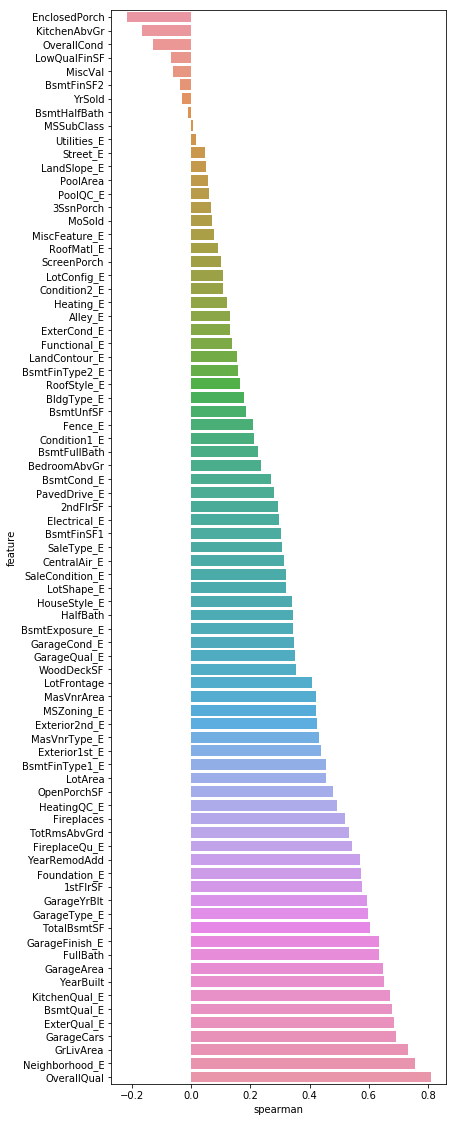

In [18]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)


Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear. OverallQual is main criterion in establishing house price. Neighborhood has big influence, partially it has some intrisinc value in itself, but also houses in certain regions tend to share same characteristics (confunding) what causes similar valuations

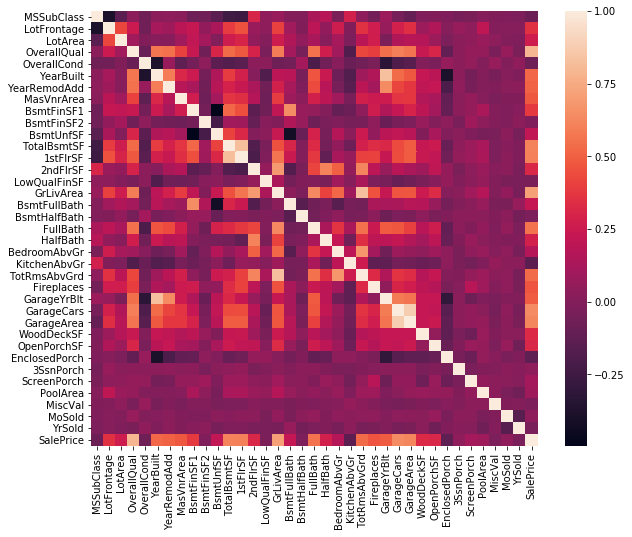

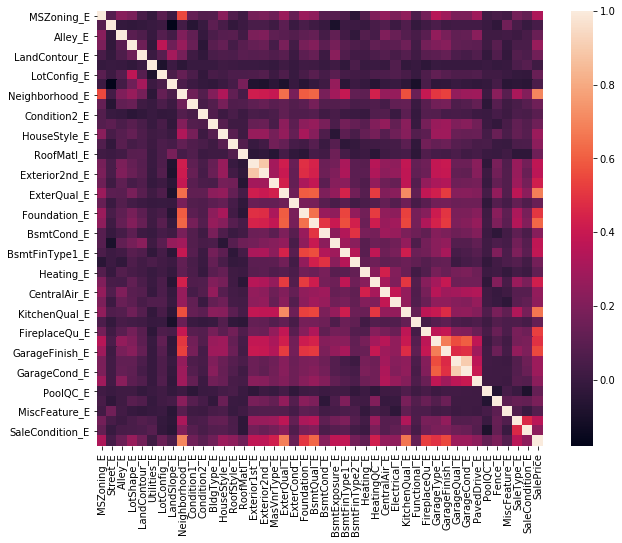

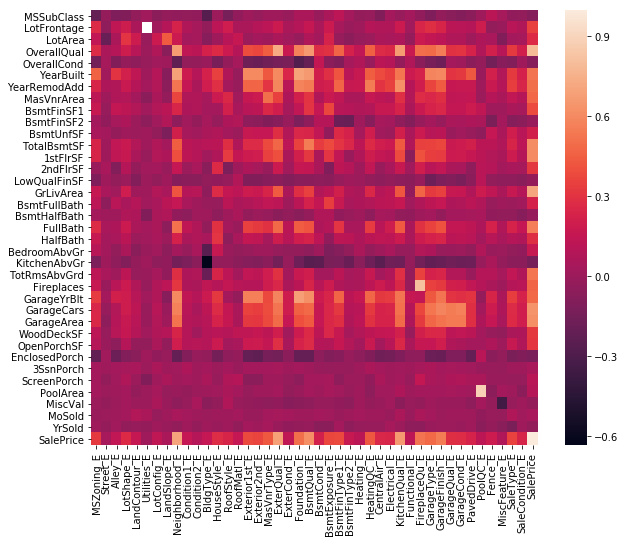

In [19]:
#변수 그룹별 상관관계
#Correlation matrix

plt.figure(figsize=(10, 8)) 
plt.figure(1)
corr = train[quantitative+['SalePrice']].corr()
sns.heatmap(corr)

plt.figure(figsize=(10, 8))
plt.figure(2)
corr = train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)

plt.figure(figsize=(10, 8))
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr)

There are many strong correlations between variables. Garages seem to be built same year as houses, basements have generally same area as first floor which is pretty obvious. Garage area is strongly correlated with number of cars. Neighborhood is correlated with lots of other variables and this confirms the idea that houses in same region share same characteristics. Dwelling type is negatively correlated with kitchen above grade.

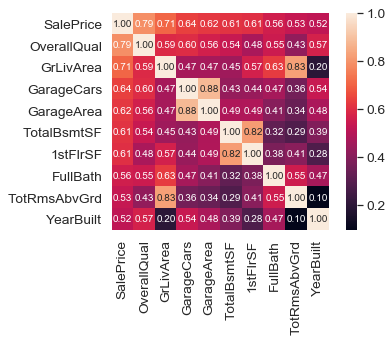

In [20]:
#saleprice correlation matrix

k = 10 #number of variables for heatmap
corrmat= train[quantitative+['SalePrice']].corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\dojin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


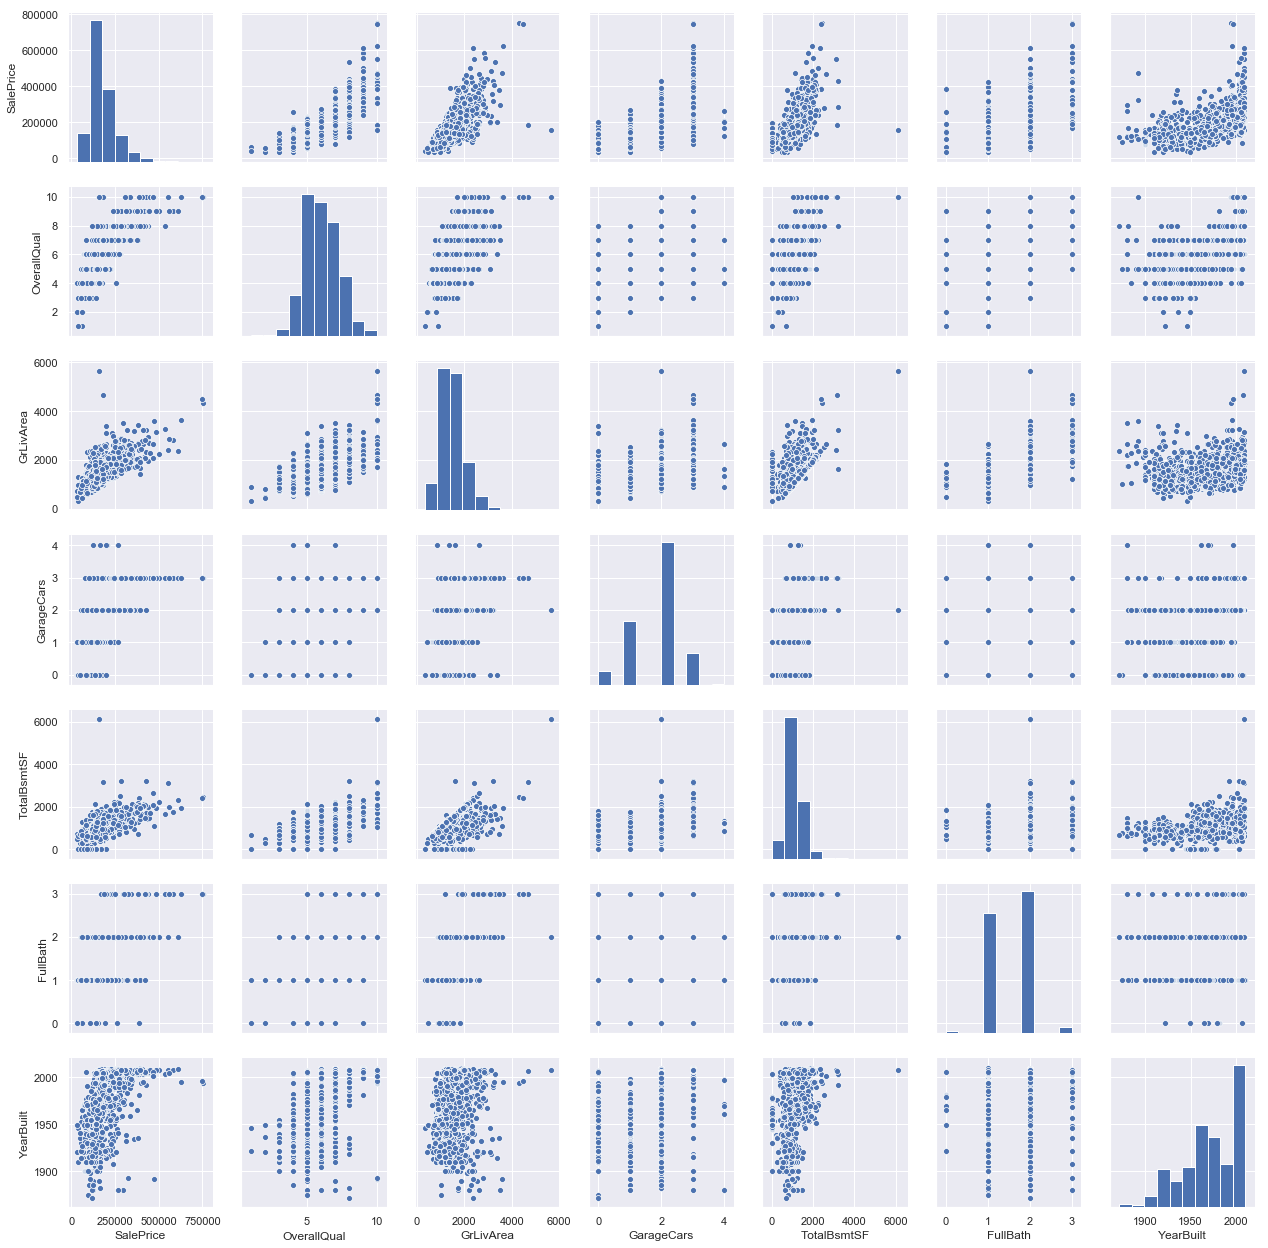

In [21]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

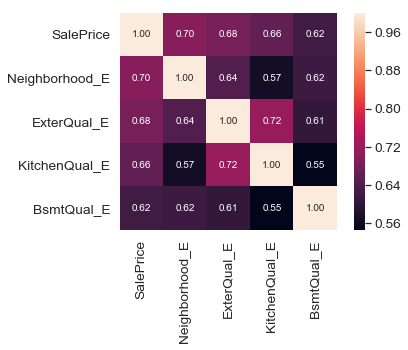

In [22]:
#saleprice correlation matrix

k = 5 #number of variables for heatmap
corrmat= train[qual_encoded+['SalePrice']].corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
# 양적변수간의 상관관계: GarageCars-GarageArea, 1stFlrSF-TotalBsmtSF, YearBuilt-GarageYrBlt, GrLivArea-TotRmsAbvGrd
# (대표변수 사용),(1stFlrSF 삭제-> GrLivArea대체),(YearBuilt삭제-> YearRemodAdd대체 ),(TotRmsAbvGrd삭제->가중치 전체룸으로 새로만듬)
# 질적변수간의 상관관계: Exterior1st-Exterior2nd, GarageQual-GarageCond :변수 통합(a+b)
# 두집단간 상관관계: PoolArea-PoolQC, Fireplaces-FireplaceQu :변수 통합 (a*b)


In [24]:
# 인코딩한 데이터로 대체해서 df 새로 만듬
train_E=train[quantitative+qual_encoded]

## Pairplots
It also would be useful to see how sale price compares to each independent variable.

C:\Users\dojin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


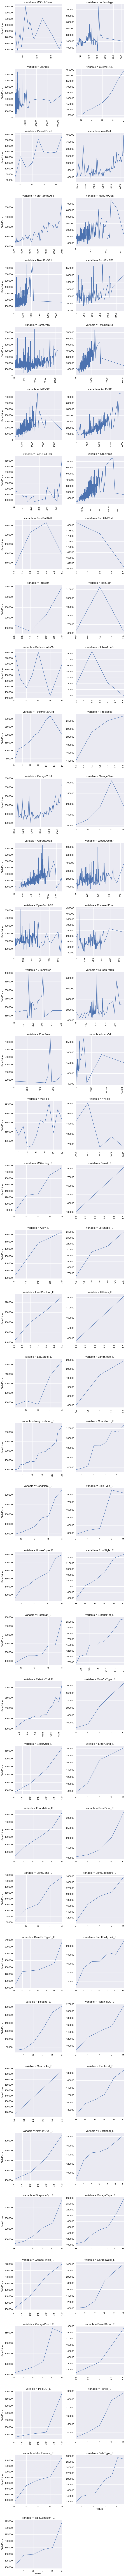

In [25]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

Observation

Mosold:
Tends to look like in the middle of the year May, June, July house are more likely to be sold, which makes sense as alot of people usually like to invest by the end of fiscal year cycle and during the holidays.

yearbulit:
We can clearly see, the number of houses which were built after 2000 are more likely to be expensive. So, we can assume because of factors like; they might have more amenities or these houses could be more modernize based on current market trends etc. Nonetheless, we can get a decent picture of the trend here.

overall qulity:
As the plot shows, it is clear as the quality of the houses improves the sales prices goes proportionally.

## Data Cleaning

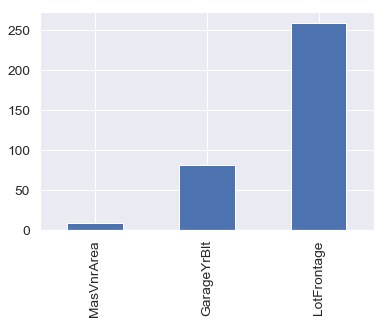

In [26]:
# count the number of NaN values in each column
missing = train_E.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


#19 attributes have missing values, 5 over 50% of all data. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

In [27]:
#Missing Data
dfNullPct = train_E.isnull().sum() * 100 / len(train_E)
missings = pd.DataFrame(dfNullPct.drop(dfNullPct[dfNullPct == 0].index).sort_values(ascending=False), columns=['Missing Pct'])
missings

,Missing Pct
LotFrontage,17.739726
GarageYrBlt,5.547945
MasVnrArea,0.547945


질적 변수의 NA가 처리된것을 볼수있다. 양적변수 3개는 위에서 논의한대로 GarageYrBlt 의 NA는 garage가 없기 때문인데 1900~2000 사이의 
연속형변수에서 어떤값을 주어야 할지 생각을 해보자. 다른 모든 연관된 garage 변수들을 보면 모두다 종속변수와 관계가 선형을 나타내고 있는데
그것에 맞추어 보면 1800을 주면 타당해보인다. 나중에 정규화를 시키면 크기차이가 아닌 비율차이로 되니 1800으로 준다.
LotFrontage,MasVnrArea는 다른 변수로 대체되므로 삭제.


위에 인코딩으로 모든 변수가 순서형으로 변환되었으나 여기서 문제는 날짜변수이다. 그러나 GarageYrBlt,YearRemodAdd 변수는 최신일수록 가격이 높은것이 선형으로 확인되고 논리적으로도 타당하기에 연속형 변수로 놔두는게 낫다.
그러나 MoSold는 월별이나 계절별로 의미를 가질수 있고 YrSold 역시 최근 5년간 데이터만 있으므로 단기 경제상황이나 부동산투기 boom등 연도별 영향을 나타내는 변수기에 카테고리화 해야한다. 그러나 차원이 많이 늘어나기에 적절하지 않고 두 변수를 합쳐서 년월 변수를 만들던가 연분기 변수를 만들어 연도별 분기별 차이를 분석하도록 카테고리화 하는것이 낫다. 그러나 여기선 그냥 단순 카테고리화 하기로 한다.

In [28]:
train_E['GarageYrBlt'] = train_E['GarageYrBlt'].fillna(1800)


C:\Users\dojin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
# modeling

In [30]:
df= train_E[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']]
df_E= train_E[['Neighborhood_E','ExterQual_E']]

In [31]:
df=pd.concat([df, df_E], axis=1)


In [32]:
df['SalePrice']=train['SalePrice']

In [47]:
Label = df['SalePrice']
features = df.iloc[:,:6]

In [48]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    features, Label, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("train siza: {}   validate size: {}   test size:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


# X_train, y_train  //  X_valid, y_valid  //  X_test, y_test

train siza: 821   validate size: 274   test size: 365



In [49]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
print("train set acc: {:.3f}".format(forest.score(X_train, y_train)))
print("valid set ac: {:.3f}".format(forest.score(X_valid, y_valid)))

train set acc: 0.969
valid set ac: 0.835


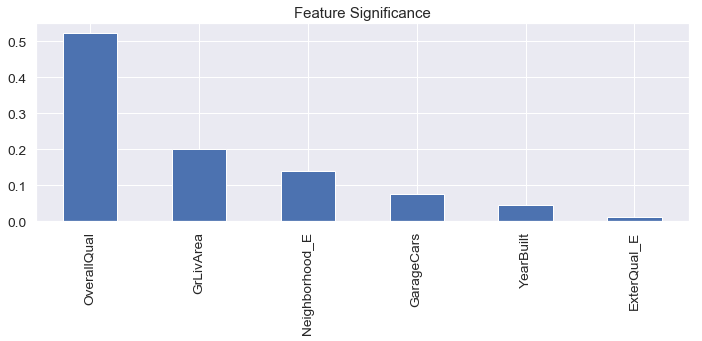

In [51]:
# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(forest.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [52]:
# 최종 테스트 (위에서 가장 성능좋은것 실행후 하자 이름이 모두 gbrt로 같기 때문.)
print("train set acc: {:.3f}".format(forest.score(X_train, y_train)))
print("test set acc: {:.3f}".format(forest.score(X_test, y_test)))

train set acc: 0.969
test set acc: 0.830


Variable: OverallQual          Importance: 0.52
Variable: GrLivArea            Importance: 0.2
Variable: Neighborhood_E       Importance: 0.14
Variable: GarageCars           Importance: 0.08
Variable: YearBuilt            Importance: 0.05
Variable: ExterQual_E          Importance: 0.01


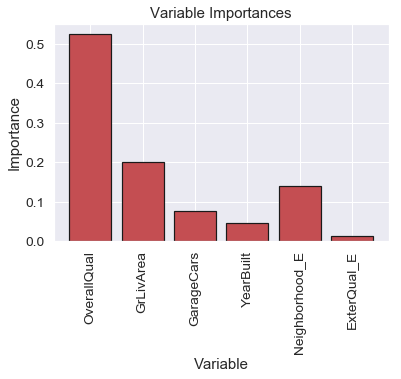

In [53]:
# Get numerical feature importances

feature_list = list(X_train.columns)
importances = list(forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

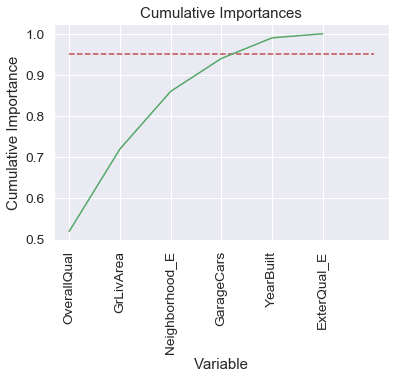

In [58]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 80% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');